### Maximum Likelihood Estimation

This is used to calculate the best way of fitting a mathematical model to some data.

For example, suppose you are interested in the average heights of colleage students in a state. You have a sample of some number (sample height) of the state but not the entire population.

Further, you are willing to assume that heights are normally distributed with some unknown mean and variance.

The sample mean is then the maximum likelihood estimator of the population mean.

For a fixed set of data and underlying probability model, maximum likelihood picks the values of the model parameters that make the data more likely than any other values of the parameters would make them.

Given a statistical model (e.g. normal distribution) for the data, it is necesary to estimate the population parameter of the model.

In [1]:
#Python implimentation of Maximum- Likelihood Estimation
import numpy as np
import math

In [2]:
x = np.array([[1, 2, 3, 4, 5]])

n = np.shape(x) [1]

print("The sample data: \n", x)
print("The number of data present in x is: ", n)

mu = np.array([[1, 2, 3, 2, 3]])
sigma = np.array([[1, 2, 2, 3, 3]])
print("\nThe mean is: ", mu)
print("The st. dev is: ", sigma)

print("Mu Sigma logL")
for i in range(5):
    logL = -np.sum(np.square(x - mu[0, i])/(2*np.square(sigma[0, i]))) - (0.5*n*np.log10(2*math.pi)) - n*np.log10(sigma[0, i])
    print(mu[0, i], sigma[0, i], np.round(logL, 3))

The sample data: 
 [[1 2 3 4 5]]
The number of data present in x is:  5

The mean is:  [[1 2 3 2 3]]
The st. dev is:  [[1 2 2 3 3]]
Mu Sigma logL
1 1 -16.995
2 2 -5.376
3 2 -4.751
2 3 -5.214
3 3 -4.937


### Introduction to Optimization Cost Function 

#### Cost Function Practical Explanation

#### Cost Function

In [3]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

#### Creating sample Data

In [4]:
# creating the sample dataset
experience = [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4]
salary     = [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2]

data = pd.DataFrame({
    "salary" : salary,
    "experience" : experience
})
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


#### Plotting the data

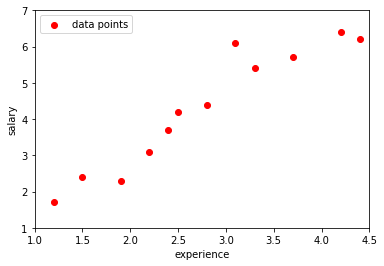

In [5]:
# plotting the data
plt.scatter(data.experience, data.salary, color = "red", label = "data points")
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel("experience")
plt.ylabel("salary")
plt.legend()

There is a liner relationship between salary and experience as seen in the diagram above

#### Starting the Line using small values of parameters

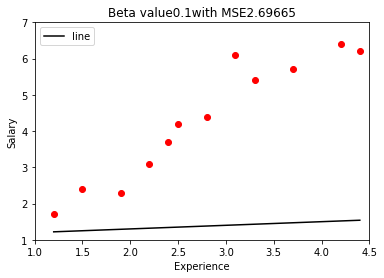

In [6]:
#making lines for different values of Beta 0.1, 0.8, 1.5
beta = 0.1

#keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

#generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# plotting the line
plt.scatter(data.experience, data.salary, color = "red")
plt.plot(data.experience, line1, color = "black", label = "line")
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta value" + str(beta) + "with MSE" + str(MSE))
MSE = mse(data.experience, line1)

In the diagram above, we can see that the slope (beta = 0.1) is less. Hence, we will change the slope to Beta = 1.5

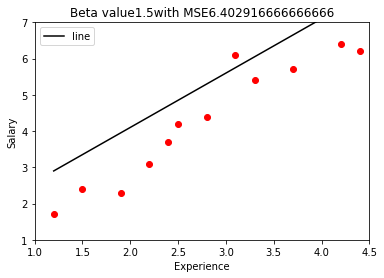

In [7]:
#making lines for different values of Beta 0.1, 0.8, 1.5
beta = 1.5

#keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

#generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# plotting the line
plt.scatter(data.experience, data.salary, color = "red")
plt.plot(data.experience, line1, color = "black", label = "line")
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta value" + str(beta) + "with MSE" + str(MSE))
MSE = mse(data.experience, line1)

We see a better slope but probably more than we want. We will try a slope of 0.8

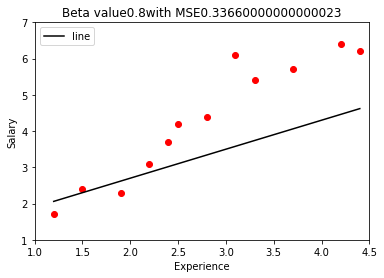

In [8]:
#making lines for different values of Beta 0.1, 0.8, 1.5
beta = 0.8

#keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

#generating predictions for every data point
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# plotting the line
plt.scatter(data.experience, data.salary, color = "red")
plt.plot(data.experience, line1, color = "black", label = "line")
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta value" + str(beta) + "with MSE" + str(MSE))
MSE = mse(data.experience, line1)

We can see that each of the diagram has a different mean squared error(mse)
Here we see the relationship between beta and mse 

#### Computing cost over a range of values of Beta

In [9]:
# function to calculate error

def Error(Beta, data):
    # b is constant
    b = 1.1
    
    salary = []
    experience = data.experience

    # Loop to calculate predicted salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] + Beta + b
        salary.append(tmp)
    MSE = mse(experience, salary)
    return MSE

In [10]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range (0, 150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)

In [11]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head()    

,Beta,Cost
0,0.00,1.2100
1,0.01,1.2321
2,0.02,1.2544
3,0.03,1.2769
4,0.04,1.2996


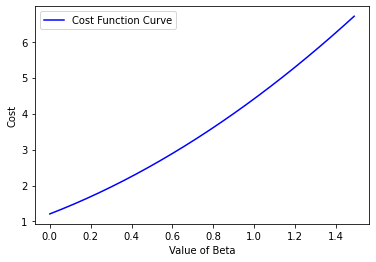

In [12]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = "blue", label = "Cost Function Curve")
plt.xlabel("Value of Beta")
plt.ylabel("Cost")
plt.legend()

In [ ]:
#Why do i have different figures and curve?!